In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from mplsoccer import Pitch
import matplotlib.pyplot as plt

### Analysis of Tactics Data

In [2]:
tactics = pd.read_csv('tactics.csv')
tactics

,id,timestamp,formation,player_id,name,position_id,position,jersey
0,91fdaa62-e36b-4aca-8c56-7a6d32289483,2022-04-01 00:00:00.000,41212.0,33664.0,Rachael Laws,1.0,Goalkeeper,27.0
1,aae12223-7969-4f4e-ac4e-83b075af1352,2022-04-01 00:00:00.000,4231.0,19780.0,Rachel Rowe,2.0,Right Back,23.0
2,92f7b2d2-d048-4bbc-b8ff-67dcfc328fb2,2022-04-01 00:00:00.000,4222.0,5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,19.0
3,e61277b1-87a1-40e5-becc-dd727c821920,2022-04-01 00:00:00.000,41221.0,15516.0,Thierry Henry,21.0,Left Wing,14.0
4,3188f369-064a-4e96-9ed4-c52700070e58,2022-04-01 00:23:32.191,4222.0,5216.0,Andrés Iniesta Luján,15.0,Left Center Midfield,8.0
...,...,...,...,...,...,...,...,...
50398,NaN,NaN,NaN,5208.0,Thiago Alcântara do Nascimento,13.0,Right Center Midfield,10.0
50399,NaN,NaN,NaN,30486.0,Pedro González López,15.0,Left Center Midfield,26.0
50400,NaN,NaN,NaN,6685.0,Mikel Oyarzabal Ugarte,17.0,Right Wing,21.0
50401,NaN,NaN,NaN,16532.0,Daniel Olmo Carvajal,21.0,Left Wing,19.0


In [26]:
tactics['timestamp'] = tactics['timestamp'].transform(pd.Timestamp)
tactics

,id,timestamp,formation,player_id,name,position_id,position,jersey
0,91fdaa62-e36b-4aca-8c56-7a6d32289483,2022-04-01 00:00:00.000,41212.0,33664.0,Rachael Laws,1.0,Goalkeeper,27.0
1,aae12223-7969-4f4e-ac4e-83b075af1352,2022-04-01 00:00:00.000,4231.0,19780.0,Rachel Rowe,2.0,Right Back,23.0
2,92f7b2d2-d048-4bbc-b8ff-67dcfc328fb2,2022-04-01 00:00:00.000,4222.0,5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,19.0
3,e61277b1-87a1-40e5-becc-dd727c821920,2022-04-01 00:00:00.000,41221.0,15516.0,Thierry Henry,21.0,Left Wing,14.0
4,3188f369-064a-4e96-9ed4-c52700070e58,2022-04-01 00:23:32.191,4222.0,5216.0,Andrés Iniesta Luján,15.0,Left Center Midfield,8.0
...,...,...,...,...,...,...,...,...
50398,NaN,NaT,NaN,5208.0,Thiago Alcântara do Nascimento,13.0,Right Center Midfield,10.0
50399,NaN,NaT,NaN,30486.0,Pedro González López,15.0,Left Center Midfield,26.0
50400,NaN,NaT,NaN,6685.0,Mikel Oyarzabal Ugarte,17.0,Right Wing,21.0
50401,NaN,NaT,NaN,16532.0,Daniel Olmo Carvajal,21.0,Left Wing,19.0


In [7]:
tactics['position_id'].value_counts(dropna = False)

1.0     4204
5.0     4200
3.0     4199
NaN     4159
2.0     3744
6.0     3743
23.0    3088
13.0    2946
15.0    2937
17.0    2570
21.0    2565
10.0    1921
19.0    1379
11.0    1245
9.0     1233
16.0    1211
12.0    1205
24.0    1111
22.0    1111
4.0      479
7.0      390
8.0      389
18.0     108
14.0     107
20.0     106
25.0      53
Name: position_id, dtype: int64

In [163]:
tactics['jersey'].value_counts(dropna = False)

NaN      4159
1.0      2706
10.0     2704
3.0      2439
4.0      2267
8.0      2243
5.0      2230
6.0      2182
9.0      2121
7.0      1980
11.0     1938
14.0     1844
2.0      1797
15.0     1767
20.0     1688
18.0     1584
16.0     1501
22.0     1472
17.0     1436
23.0     1433
21.0     1372
19.0     1371
13.0     1091
12.0     1087
24.0     1040
25.0      635
0.0       491
27.0      310
26.0      301
28.0      279
29.0      208
30.0      184
37.0      108
31.0       85
33.0       60
32.0       56
35.0       50
44.0       47
34.0       26
36.0       24
99.0       19
77.0       13
73.0       12
39.0       11
38.0       10
66.0        8
40.0        5
41.0        3
42.0        2
45.0        2
100.0       1
88.0        1
Name: jersey, dtype: int64

In [60]:
timestamps = tactics['timestamp']
timestamps

0       2022-04-01 00:00:00.000
1       2022-04-01 00:00:00.000
2       2022-04-01 00:00:00.000
3       2022-04-01 00:00:00.000
4       2022-04-01 00:23:32.191
                  ...          
50398                       NaT
50399                       NaT
50400                       NaT
50401                       NaT
50402                       NaT
Name: timestamp, Length: 50403, dtype: datetime64[ns]

In [61]:
timestamps.max()


Timestamp('2022-04-01 00:53:48.453000')

In [ ]:
# something got messed up with the timestamps data

In [62]:
timestamps.min()

Timestamp('2022-04-01 00:00:00')

In [ ]:
# position id dict: https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Events%20v4.0.0.pdf - image 1
# most common are: gk (obviously), followed by Left center back, right center back, right back, left back
# this matches intuition because we know that defense people are the least likely to be substituted out for the 90 minutes (intuitively, attackers/midfielders do more running)
# least utilized/most substituted = second striker, left attacking mid, center mid, right attacking mid, left wing back, and right wing back
# number of nans are very high - seem to match all of the entries that just correspond to hte formation or whatever


In [ ]:
# make a bar graph out of the above, show that goalkeepers are most common positions in all lineups

In [9]:
tactics[pd.isna(tactics['position_id'])]

,id,timestamp,formation,player_id,name,position_id,position,jersey
45,16991f42-603b-4a54-b5b4-29cd2bb52253,2022-04-01 00:00:42.646,352.0,NaN,NaN,NaN,NaN,NaN
46,3453d318-036d-445e-a24f-88b3c3a19e05,2022-04-01 00:00:00.000,4141.0,NaN,NaN,NaN,NaN,NaN
47,fb38d53c-181c-456f-a7a3-323fddc09099,2022-04-01 00:00:00.000,4231.0,NaN,NaN,NaN,NaN,NaN
48,fb56a7a7-bdaa-4500-a0dd-0f5d5f6645a3,2022-04-01 00:13:10.773,442.0,NaN,NaN,NaN,NaN,NaN
49,3ad0091b-5d4a-4d2e-abbc-be55b97825f3,2022-04-01 00:18:50.360,4231.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4199,d111e504-c3b2-4a13-8a64-9d97c5326d73,2022-04-01 00:31:20.199,433.0,NaN,NaN,NaN,NaN,NaN
4200,5fe97254-c9f5-4f9e-8c93-0a177a17dce9,2022-04-01 00:46:14.275,4231.0,NaN,NaN,NaN,NaN,NaN
4201,9439008d-ff21-4a31-8709-19e0f1c2a33a,2022-04-01 00:00:01.824,433.0,NaN,NaN,NaN,NaN,NaN
4202,c4abb7b1-2af3-4924-b8e7-2cd95b46dc1c,2022-04-01 00:08:15.882,4231.0,NaN,NaN,NaN,NaN,NaN


In [22]:
formations = tactics[["id", "formation"]].dropna()

In [27]:
formations

,id,formation
0,91fdaa62-e36b-4aca-8c56-7a6d32289483,41212.0
1,aae12223-7969-4f4e-ac4e-83b075af1352,4231.0
2,92f7b2d2-d048-4bbc-b8ff-67dcfc328fb2,4222.0
3,e61277b1-87a1-40e5-becc-dd727c821920,41221.0
4,3188f369-064a-4e96-9ed4-c52700070e58,4222.0
...,...,...
4199,d111e504-c3b2-4a13-8a64-9d97c5326d73,433.0
4200,5fe97254-c9f5-4f9e-8c93-0a177a17dce9,4231.0
4201,9439008d-ff21-4a31-8709-19e0f1c2a33a,433.0
4202,c4abb7b1-2af3-4924-b8e7-2cd95b46dc1c,4231.0


In [16]:
tactics[pd.isna(tactics['position_id'])]

,id,timestamp,formation,player_id,name,position_id,position,jersey
45,16991f42-603b-4a54-b5b4-29cd2bb52253,2022-04-01 00:00:42.646,352.0,NaN,NaN,NaN,NaN,NaN
46,3453d318-036d-445e-a24f-88b3c3a19e05,2022-04-01 00:00:00.000,4141.0,NaN,NaN,NaN,NaN,NaN
47,fb38d53c-181c-456f-a7a3-323fddc09099,2022-04-01 00:00:00.000,4231.0,NaN,NaN,NaN,NaN,NaN
48,fb56a7a7-bdaa-4500-a0dd-0f5d5f6645a3,2022-04-01 00:13:10.773,442.0,NaN,NaN,NaN,NaN,NaN
49,3ad0091b-5d4a-4d2e-abbc-be55b97825f3,2022-04-01 00:18:50.360,4231.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4199,d111e504-c3b2-4a13-8a64-9d97c5326d73,2022-04-01 00:31:20.199,433.0,NaN,NaN,NaN,NaN,NaN
4200,5fe97254-c9f5-4f9e-8c93-0a177a17dce9,2022-04-01 00:46:14.275,4231.0,NaN,NaN,NaN,NaN,NaN
4201,9439008d-ff21-4a31-8709-19e0f1c2a33a,2022-04-01 00:00:01.824,433.0,NaN,NaN,NaN,NaN,NaN
4202,c4abb7b1-2af3-4924-b8e7-2cd95b46dc1c,2022-04-01 00:08:15.882,4231.0,NaN,NaN,NaN,NaN,NaN


In [79]:
tactics.groupby('player_id').count().sort_values(by = 'name', ascending = False).head(20)

,id,timestamp,formation,name,position_id,position,jersey
player_id,,,,,,,
5503.0,1,1,1,940,940,940,940
5203.0,0,0,0,637,637,637,637
5213.0,1,1,1,603,603,603,603
20176.0,0,0,0,510,510,510,510
5216.0,1,1,1,500,500,500,500
5211.0,0,0,0,452,452,452,452
20131.0,1,1,1,445,445,445,445
4324.0,0,0,0,404,404,404,404
20125.0,0,0,0,336,336,336,336


# Top 20 Players Represented Across All Lineups:
- Messi (forward), barcelona
- Sergio Busquets (defensive mid), barcelona
- Gerard Pique (center back), barcelona
- Víctor Valdés Arribas (goalkeeper), ____
- Andres Iniesta Lujan (center mid), barcelona
- jordi alba ramos (left back), barcelona
- xavi (center mid), barcelona
- Dani Alves (right back), barcelona
- carles puyol (center back or other defense), barcelona
- javi alejandro mascherano (center mid or center back), barcelona
- marc-andre ter stegen (goalkeeper), barcelona
- Luis Alberto Suárez, (center forward), barcelona
- Ivan Rakitić (center/defensive mid), barcelona now sevilla
- Sergi Roberto (mid and defense), barcelona
- eric-sylvain bilal abidal (defense), barcelona and lyon
- neymar (left wing), barcelona and psg
- adriano (left back, left wing), sevilla and barcelona
- thierry henry (center forward, left wing), arsenal and barcelona
- antoine griezmann (attacking mid, center forward), atletico and barcelona

### MAJORITY FROM BARCELONA... BARCELONA IS OVERREPRESENTED, AND WE CAN SEE CONFOUNDING BETWEEN PEOPLE WHO HAD LONGER CAREERS + PEOPLE WHO PLAYED FOR BARCA

In [100]:
tactics[tactics.get('player_id') == 5487.0]

,id,timestamp,formation,player_id,name,position_id,position,jersey
4607,NaN,NaT,NaN,5487.0,Antoine Griezmann,20.0,Left Attacking Midfield,7.0
4629,NaN,NaT,NaN,5487.0,Antoine Griezmann,16.0,Left Midfield,7.0
4991,NaN,NaT,NaN,5487.0,Antoine Griezmann,19.0,Center Attacking Midfield,7.0
5026,NaN,NaT,NaN,5487.0,Antoine Griezmann,24.0,Left Center Forward,7.0
5202,NaN,NaT,NaN,5487.0,Antoine Griezmann,24.0,Left Center Forward,17.0
...,...,...,...,...,...,...,...,...
47807,NaN,NaT,NaN,5487.0,Antoine Griezmann,22.0,Right Center Forward,7.0
47830,NaN,NaT,NaN,5487.0,Antoine Griezmann,24.0,Left Center Forward,7.0
48457,NaN,NaT,NaN,5487.0,Antoine Griezmann,24.0,Left Center Forward,17.0
49706,NaN,NaT,NaN,5487.0,Antoine Griezmann,17.0,Right Wing,7.0


In [24]:
tactics.dtypes

id              object
timestamp       object
formation      float64
player_id      float64
name            object
position_id    float64
position        object
jersey         float64
dtype: object

In [150]:
formations = tactics['formation']
formations = formations.transform(reformat_formations)

In [153]:
formation_counts = formations.value_counts()

In [148]:
def reformat_formations(formation):
    if pd.isnull(formation):
        return formation
    new_form = str(formation).rstrip(".0")
    return '-'.join(list(new_form))

<AxesSubplot:xlabel='formation'>

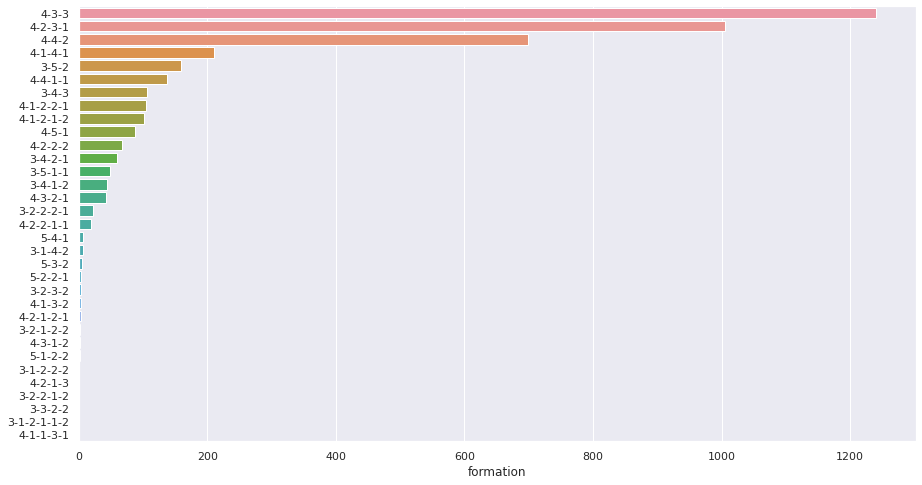

In [162]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = formation_counts, y = formation_counts.index)

In [ ]:
# visualize this with a bargraph or with a video maybe, showing the changes?

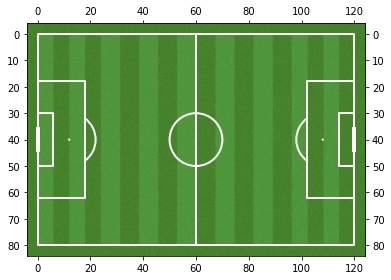

In [38]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

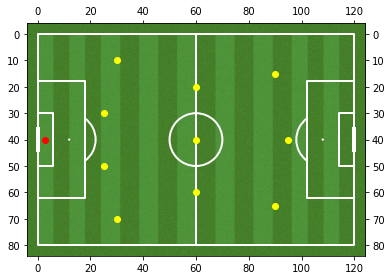

In [59]:
pitch_433 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(3, 40, color = 'red')
ax.scatter([30, 25, 25, 30, 60, 60, 60, 90, 95, 90], [10, 30, 50, 70, 20, 40, 60, 15, 40, 65], color = 'yellow')

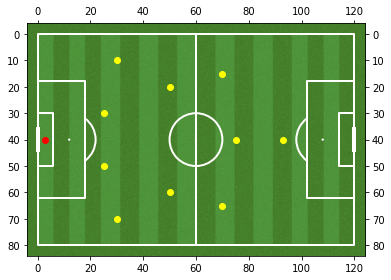

In [105]:
pitch_4231 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(3, 40, color = 'red')
# change these vals
ax.scatter([30, 25, 25, 30, 50, 50, 70, 75, 70, 93], [10, 30, 50, 70, 20, 60, 15, 40, 65, 40], color = 'yellow')

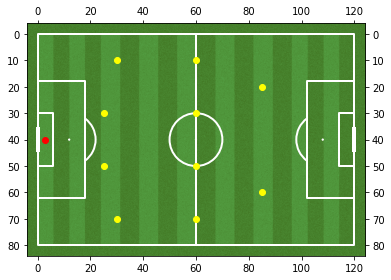

In [110]:
pitch_442 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(3, 40, color = 'red')
# change these vals
ax.scatter([30, 25, 25, 30, 60, 60, 60, 60, 85, 85], [10, 30, 50, 70, 10, 30, 50, 70, 20, 60], color = 'yellow')

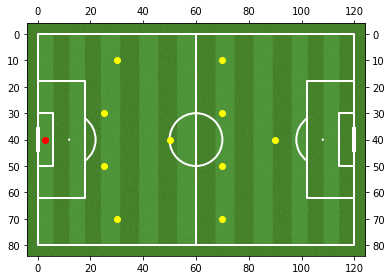

In [118]:
pitch_4141 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(3, 40, color = 'red')
# change these vals
ax.scatter([30, 25, 25, 30, 50, 70, 70, 70, 70, 90], [10, 30, 50, 70, 40, 10, 30, 50, 70, 40], color = 'yellow')

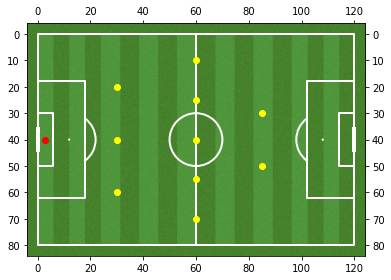

In [126]:
pitch_352 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(3, 40, color = 'red')
# change these vals
ax.scatter([30, 30, 30, 60, 60, 60, 60, 60, 85, 85], [20, 40, 60, 40, 10, 25, 55, 70, 30, 50], color = 'yellow')

### Analysis of Related Events DF

In [164]:
related_events = pd.read_csv('related_events.csv')
related_events

,id,related_events
0,91fdaa62-e36b-4aca-8c56-7a6d32289483,NaN
1,aae12223-7969-4f4e-ac4e-83b075af1352,NaN
2,ba7b6ef4-edab-43e9-8ed2-ccc073667b8f,['f8f30929-e011-4ea9-bbc9-c22873023d5f']
3,f8f30929-e011-4ea9-bbc9-c22873023d5f,['ba7b6ef4-edab-43e9-8ed2-ccc073667b8f']
4,c0927b64-b182-4e44-83f0-b77222d600f8,['2a1a0dfc-2e25-4131-bd28-e595edb7b0cb']
...,...,...
3970552,a2becaf4-d3e5-4bf3-9459-0b442020b72a,['3b1fe136-a4d5-4a58-94ab-e2ba8551cb16']
3970553,a6217adf-c93a-4229-8ea9-f1a58752ca34,['aa15567a-333d-4aca-9df0-173672564d43']
3970554,aa15567a-333d-4aca-9df0-173672564d43,['a6217adf-c93a-4229-8ea9-f1a58752ca34']
3970555,abefbcd4-a519-4879-9a28-cc09552141fc,['7be5fa66-8c67-40d6-8697-996775eb7ec2']


In [169]:
lengths = related_events.get('related_events').apply(lambda x: x if pd.isna(x) else len(x.split(',')))

In [180]:
lengths.sort_values(ascending = False).fillna(0)

1935840    35.0
3502902    13.0
3468673    13.0
3849327    12.0
3388807    12.0
           ... 
3970454     0.0
3970463     0.0
3970498     0.0
3970499     0.0
3970510     0.0
Name: related_events, Length: 3970557, dtype: float64

In [177]:
# look at things with lots of related events with the larger table

In [176]:
related_events.iloc[1935840]

id                             b483f508-cfff-4ebd-a04d-c5a8f15c4e87
related_events    ['011fba70-8315-4121-9f94-fb973978dc99', '0473...
Name: 1935840, dtype: object

In [182]:
val_counts = lengths.fillna(0).value_counts()

In [194]:
val_counts_df = pd.DataFrame(val_counts).reset_index()

In [195]:
val_counts_df

,index,related_events
0,1.0,2191578
1,2.0,1175969
2,3.0,389305
3,0.0,167997
4,4.0,39667
5,5.0,5156
6,6.0,694
7,7.0,96
8,8.0,57
9,9.0,23


<AxesSubplot:xlabel='index'>

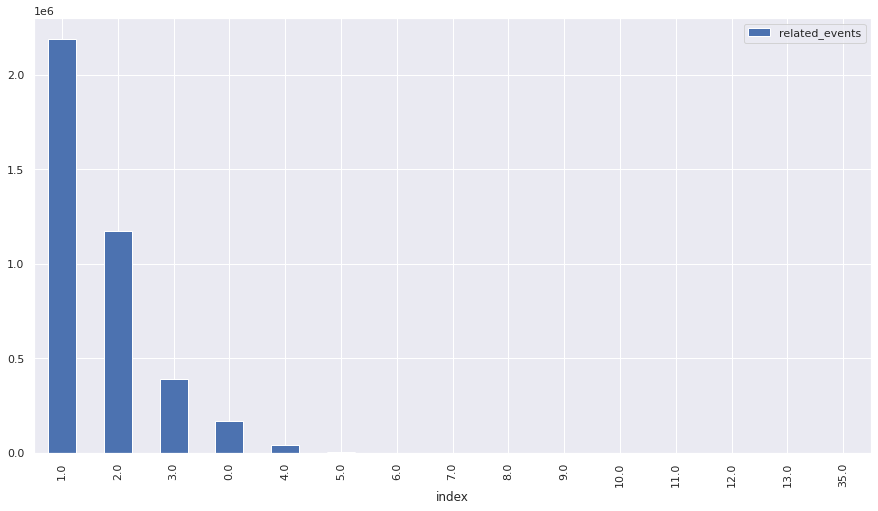

In [201]:
val_counts_df.plot.bar(x = 'index', y = 'related_events')

### Analysis of No Nulls DF (in Google Drive)
Focuses on columns that have no nulls, ie. basic event data.

In [165]:
no_nulls = pd.read_csv('nonNull.csv')
no_nulls.head(5)

,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,id,index,period,timestamp,minute,second,possession
0,35,Starting XI,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,91fdaa62-e36b-4aca-8c56-7a6d32289483,1,1,00:00:00.000,0,0,1
1,35,Starting XI,974,Reading WFC,1,Regular Play,969,Birmingham City WFC,2275050,aae12223-7969-4f4e-ac4e-83b075af1352,2,1,00:00:00.000,0,0,1
2,18,Half Start,974,Reading WFC,1,Regular Play,969,Birmingham City WFC,2275050,ba7b6ef4-edab-43e9-8ed2-ccc073667b8f,3,1,00:00:00.000,0,0,1
3,18,Half Start,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,f8f30929-e011-4ea9-bbc9-c22873023d5f,4,1,00:00:00.000,0,0,1
4,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,c0927b64-b182-4e44-83f0-b77222d600f8,5,1,00:00:00.443,0,0,2


In [166]:
no_nulls.shape

(3970562, 16)

In [3]:
no_nulls.head(10)

,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,id,index,period,timestamp,minute,second,possession
0,35,Starting XI,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,91fdaa62-e36b-4aca-8c56-7a6d32289483,1,1,00:00:00.000,0,0,1
1,35,Starting XI,974,Reading WFC,1,Regular Play,969,Birmingham City WFC,2275050,aae12223-7969-4f4e-ac4e-83b075af1352,2,1,00:00:00.000,0,0,1
2,18,Half Start,974,Reading WFC,1,Regular Play,969,Birmingham City WFC,2275050,ba7b6ef4-edab-43e9-8ed2-ccc073667b8f,3,1,00:00:00.000,0,0,1
3,18,Half Start,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,f8f30929-e011-4ea9-bbc9-c22873023d5f,4,1,00:00:00.000,0,0,1
4,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,c0927b64-b182-4e44-83f0-b77222d600f8,5,1,00:00:00.443,0,0,2
5,42,Ball Receipt*,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,2a1a0dfc-2e25-4131-bd28-e595edb7b0cb,6,1,00:00:01.299,0,1,2
6,43,Carry,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,e9e9c434-3acb-4877-9bb0-1513b74af376,7,1,00:00:01.299,0,1,2
7,17,Pressure,969,Birmingham City WFC,9,From Kick Off,974,Reading WFC,2275050,d36266bb-cdb5-462b-9d9b-6bb90fa04020,8,1,00:00:01.333,0,1,2
8,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,71905fc2-e4fb-4429-8f44-11c3942ade7d,9,1,00:00:02.582,0,2,2
9,42,Ball Receipt*,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,5f5e47d6-0278-4b42-a19a-90798c115f10,10,1,00:00:08.254,0,8,2


In [4]:
no_nulls.get("play_pattern_name").unique()

array(['Regular Play', 'From Kick Off', 'From Goal Kick',
       'From Free Kick', 'From Throw In', 'From Keeper', 'From Counter',
       'From Corner', 'Other'], dtype=object)

In [5]:
no_nulls.get("type_name").unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Ball Recovery', 'Clearance', 'Duel',
       'Foul Committed', 'Dispossessed', 'Dribbled Past', 'Dribble',
       'Block', 'Foul Won', 'Goal Keeper', 'Shot', 'Interception',
       '50/50', 'Injury Stoppage', 'Referee Ball-Drop', 'Shield',
       'Player Off', 'Player On', 'Half End', 'Offside', 'Substitution',
       'Tactical Shift', 'Camera On', 'Error', 'Bad Behaviour',
       'Camera off', 'Own Goal Against', 'Own Goal For'], dtype=object)

#### Looks at the basic information about shots from the no null dataframe (does not have shot-specific columns).

In [8]:
shots = no_nulls[no_nulls.get("type_name") == 'Shot']
shots.head(5)

,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,id,index,period,timestamp,minute,second,possession
187,16,Shot,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,e24077b9-2ca6-4680-9e8e-761bc9ba4845,188,1,00:05:23.402,5,23,17
332,16,Shot,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,0d58fd05-2175-48d8-a9b6-2085920f1812,333,1,00:08:43.612,8,43,25
478,16,Shot,969,Birmingham City WFC,3,From Free Kick,969,Birmingham City WFC,2275050,7b728a6c-d483-4e5b-8061-a0b849722cea,479,1,00:11:43.335,11,43,32
515,16,Shot,974,Reading WFC,3,From Free Kick,974,Reading WFC,2275050,9bdbfc3d-959d-4fc4-bac2-6b5d154191e9,516,1,00:12:26.245,12,26,34
546,16,Shot,974,Reading WFC,4,From Throw In,974,Reading WFC,2275050,ce34292d-68c7-40e9-a949-31c5fc7f2ec7,547,1,00:13:01.452,13,1,36


In [31]:
shots.get('team_name').value_counts()

Barcelona              8248
Chelsea FCW            1153
Manchester City WFC    1088
Arsenal WFC             968
Reading WFC             771
                       ... 
Numancia                 10
AS Monaco                 9
Southampton               5
FC Porto                  4
Leicester City            2
Name: team_name, Length: 159, dtype: int64

In [14]:
minute_counts = shots.get('minute').value_counts()
minute_counts

46     430
45     393
47     355
56     352
91     345
      ... 
101      5
115      5
110      4
114      3
128      2
Name: minute, Length: 129, dtype: int64

In [28]:
shots.get('minute')

187          5
332          8
478         11
515         12
546         13
          ... 
3970550    123
3970552    124
3970554    125
3970556    125
3970558    127
Name: minute, Length: 28025, dtype: int64

In [29]:
minute_bins = shots.get('minute').transform(lambda x: x - (x%5))
minute_bins

187          5
332          5
478         10
515         10
546         10
          ... 
3970550    120
3970552    120
3970554    125
3970556    125
3970558    125
Name: minute, Length: 28025, dtype: int64

<AxesSubplot:xlabel='minute', ylabel='count'>

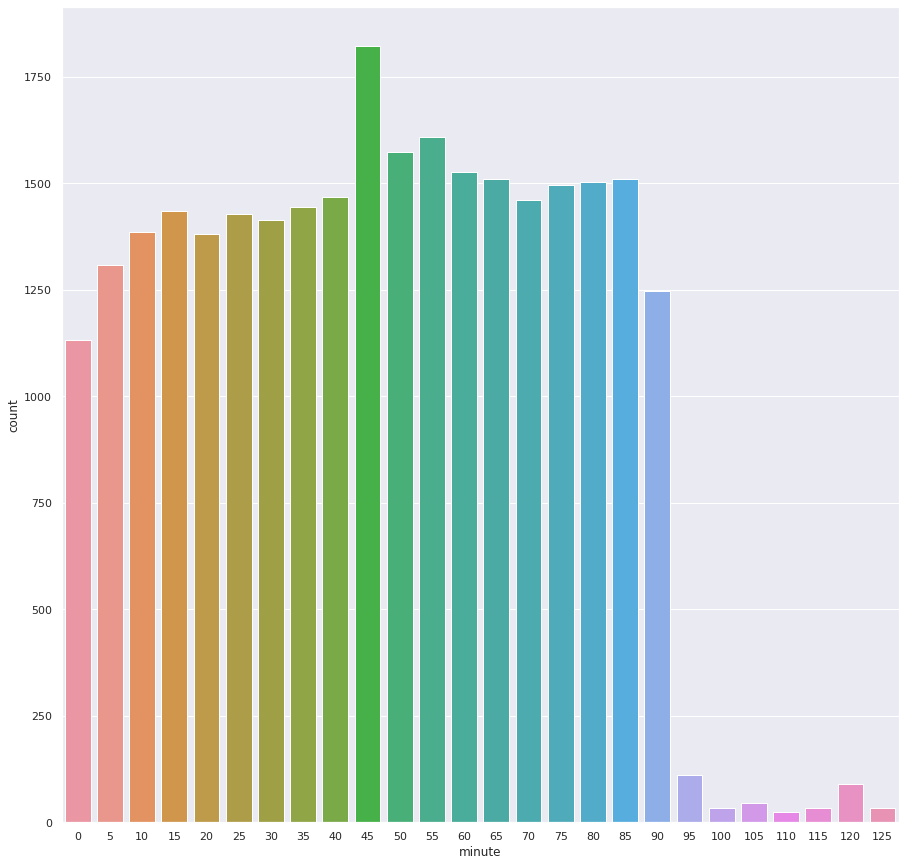

In [30]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.countplot(minute_bins)

#### Looks at the basic information about 50-50s from the no null dataframe (does not have 50-50-specific columns).

In [35]:
fifty_fifty = no_nulls[no_nulls.get("type_name") == '50/50']

In [36]:
fifty_fifty

,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,id,index,period,timestamp,minute,second,possession
354,33,50/50,974,Reading WFC,4,From Throw In,969,Birmingham City WFC,2275050,ac625bde-ccb9-4494-b18a-84f07534ec20,355,1,00:09:51.259,9,51,27
355,33,50/50,974,Reading WFC,4,From Throw In,974,Reading WFC,2275050,fcc742b8-63c4-4972-aea2-f65c8560134c,356,1,00:09:51.259,9,51,27
33331,33,50/50,217,Barcelona,4,From Throw In,217,Barcelona,69244,fdb69385-bd95-45d4-a840-edcf6b36796b,2782,2,00:15:42.959,60,42,141
33332,33,50/50,217,Barcelona,4,From Throw In,222,Villarreal,69244,5b17c6f2-a7a7-458d-b96e-39464b413519,2783,2,00:15:42.959,60,42,141
43333,33,50/50,1475,Manchester United,3,From Free Kick,1475,Manchester United,2275142,2f0c1c6c-66f4-4b5c-97c5-e2cfbe37689a,1353,1,00:38:00.737,38,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952921,33,50/50,974,Reading WFC,3,From Free Kick,972,West Ham United LFC,3775649,25b5f2c7-5075-4769-9246-ecf440f9cd37,1487,2,00:02:11.909,47,11,101
3961153,33,50/50,36,Manchester City,3,From Free Kick,1,Arsenal,3749233,6e205635-30ca-4b83-ae0a-2f5a6081bb1c,2674,2,00:23:11.326,68,11,162
3961154,33,50/50,36,Manchester City,3,From Free Kick,36,Manchester City,3749233,73c329e8-7ad9-4a8c-8b4a-9183b8d507d7,2675,2,00:23:11.326,68,11,162
3967643,33,50/50,772,Spain,1,Regular Play,773,Switzerland,3795108,c7fa2d46-12ee-48f1-9626-fb2cdddfaa6c,2072,2,00:04:36.095,49,36,89


#### Play counts for no nulls -> analyzing most common events across all teams.

In [10]:
play_type_counts = no_nulls.groupby(["play_pattern_name", "type_name"]).count().rename({'type_id': 'count'}, axis = 1)['count']

In [11]:
play_type_counts

play_pattern_name  type_name     
From Corner        50/50               100
                   Bad Behaviour        33
                   Ball Receipt*     30434
                   Ball Recovery      6224
                   Block              2617
                                     ...  
Regular Play       Shield              454
                   Shot               9856
                   Starting XI        2212
                   Substitution       3308
                   Tactical Shift      907
Name: count, Length: 280, dtype: int64

In [19]:
play_type_counts.index.get_level_values(0)

Index(['From Corner', 'From Corner', 'From Corner', 'From Corner',
       'From Corner', 'From Corner', 'From Corner', 'From Corner',
       'From Corner', 'From Corner',
       ...
       'Regular Play', 'Regular Play', 'Regular Play', 'Regular Play',
       'Regular Play', 'Regular Play', 'Regular Play', 'Regular Play',
       'Regular Play', 'Regular Play'],
      dtype='object', name='play_pattern_name', length=280)

<AxesSubplot:xlabel='play_pattern_name', ylabel='count'>

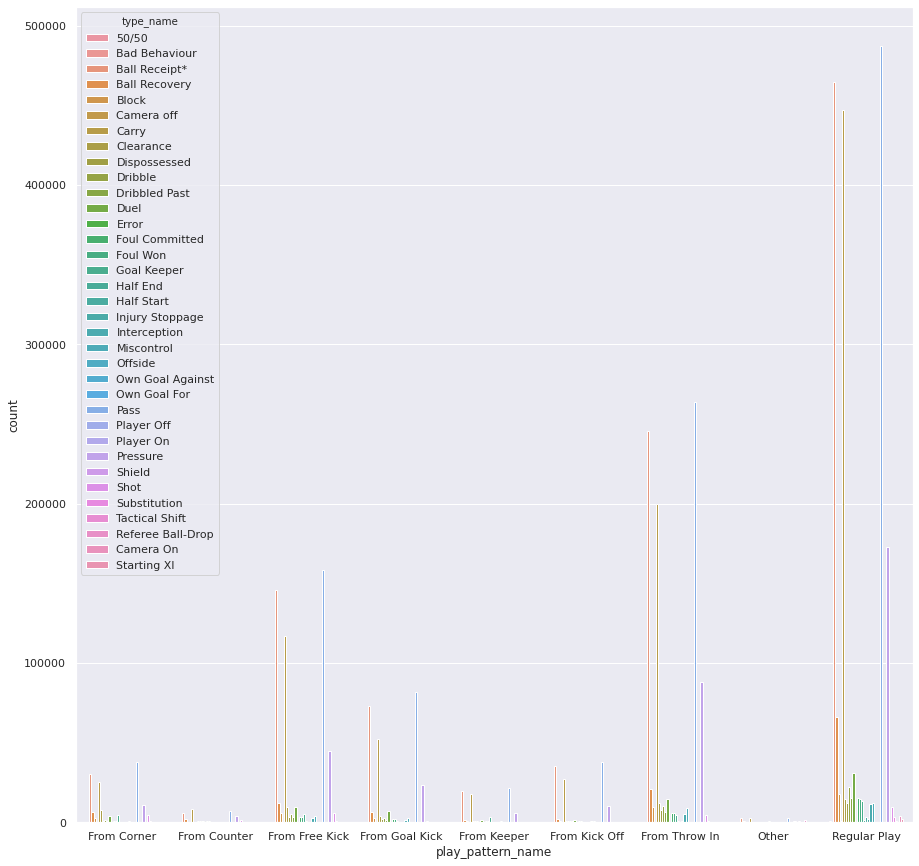

In [21]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.barplot(x = play_type_counts.index.get_level_values(0), y = play_type_counts, hue = play_type_counts.index.get_level_values(1))

## Pass Analysis

In [2]:
passes = pd.read_csv('pass_df.csv')
passes.head(5)

,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,id,...,pass_recipient_id,pass_recipient_name,pass_height_id,pass_height_name,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,pass_end_location_x,pass_end_location_y
0,35,Starting XI,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,91fdaa62-e36b-4aca-8c56-7a6d32289483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35,Starting XI,974,Reading WFC,1,Regular Play,969,Birmingham City WFC,2275050,aae12223-7969-4f4e-ac4e-83b075af1352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,Half Start,974,Reading WFC,1,Regular Play,969,Birmingham City WFC,2275050,ba7b6ef4-edab-43e9-8ed2-ccc073667b8f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,Half Start,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,f8f30929-e011-4ea9-bbc9-c22873023d5f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,c0927b64-b182-4e44-83f0-b77222d600f8,...,15562.0,Lucy Staniforth,1.0,Ground Pass,65.0,Kick Off,40.0,Right Foot,53.9,39.6


In [3]:
passes_actual = passes[passes.get('type_name') == 'Pass']
passes_actual.head(5)

,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,id,...,pass_recipient_id,pass_recipient_name,pass_height_id,pass_height_name,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,pass_end_location_x,pass_end_location_y
4,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,c0927b64-b182-4e44-83f0-b77222d600f8,...,15562.0,Lucy Staniforth,1.0,Ground Pass,65.0,Kick Off,40.0,Right Foot,53.9,39.6
8,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,71905fc2-e4fb-4429-8f44-11c3942ade7d,...,15580.0,Claudia Walker,3.0,High Pass,NaN,NaN,40.0,Right Foot,118.4,72.9
12,30,Pass,974,Reading WFC,7,From Goal Kick,974,Reading WFC,2275050,7c8f43bb-78d6-421b-a485-c8ddb83e7b1d,...,15720.0,Sophie Howard,1.0,Ground Pass,63.0,Goal Kick,38.0,Left Foot,13.4,54.2
16,30,Pass,974,Reading WFC,7,From Goal Kick,974,Reading WFC,2275050,575a6ca7-9736-4487-bd1f-12ee10011319,...,26570.0,Amalie Vevle Eikeland,1.0,Ground Pass,NaN,NaN,40.0,Right Foot,62.0,60.2
23,30,Pass,974,Reading WFC,7,From Goal Kick,969,Birmingham City WFC,2275050,719c6c68-fa1e-4aab-ab70-601450bc44d6,...,31563.0,Rachel Williams,3.0,High Pass,NaN,NaN,38.0,Left Foot,69.9,13.3


In [18]:
passes_actual.columns

Index(['type_id', 'type_name', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_type_id', 'pass_type_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y'],
      dtype='object')

In [27]:
pass_cols = passes_actual.get(['pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_type_id', 'pass_type_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y']).reset_index(drop = True)

In [28]:
pass_cols

,pass_length,pass_angle,pass_recipient_id,pass_recipient_name,pass_height_id,pass_height_name,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,pass_end_location_x,pass_end_location_y
0,7.117584,-3.071286,15562.0,Lucy Staniforth,1.0,Ground Pass,65.0,Kick Off,40.0,Right Foot,53.9,39.6
1,72.217730,0.431441,15580.0,Claudia Walker,3.0,High Pass,NaN,NaN,40.0,Right Foot,118.4,72.9
2,12.601587,0.943167,15720.0,Sophie Howard,1.0,Ground Pass,63.0,Goal Kick,38.0,Left Foot,13.4,54.2
3,22.489109,0.089050,26570.0,Amalie Vevle Eikeland,1.0,Ground Pass,NaN,NaN,40.0,Right Foot,62.0,60.2
4,34.269080,0.099378,31563.0,Rachel Williams,3.0,High Pass,NaN,NaN,38.0,Left Foot,69.9,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1098101,14.447491,-2.053018,5208.0,Thiago Alcântara do Nascimento,1.0,Ground Pass,62.0,Free Kick,40.0,Right Foot,64.4,25.4
1098102,27.290474,-0.855413,5211.0,Jordi Alba Ramos,1.0,Ground Pass,NaN,NaN,40.0,Right Foot,91.8,3.1
1098103,9.902020,1.550597,6685.0,Mikel Oyarzabal Ugarte,1.0,Ground Pass,NaN,NaN,38.0,Left Foot,92.0,13.0
1098104,53.027540,1.027789,6840.0,Marcos Llorente Moreno,3.0,High Pass,NaN,NaN,38.0,Left Foot,117.1,57.7


### Setting up the pass success column by finding the events immediately after pass events and defining a success as the same team having possession.

In [4]:
pass_vals = (passes.get('type_name') == 'Pass')

In [5]:
pass_vals

0          False
1          False
2          False
3          False
4           True
           ...  
3970557    False
3970558    False
3970559    False
3970560    False
3970561    False
Name: type_name, Length: 3970562, dtype: bool

In [6]:
pass_vals.index = pass_vals.index + 1
pass_vals

1          False
2          False
3          False
4          False
5           True
           ...  
3970558    False
3970559    False
3970560    False
3970561    False
3970562    False
Name: type_name, Length: 3970562, dtype: bool

In [7]:
pass_vals = pass_vals[:3970561]
pass_vals

1          False
2          False
3          False
4          False
5           True
           ...  
3970557    False
3970558    False
3970559    False
3970560    False
3970561    False
Name: type_name, Length: 3970561, dtype: bool

In [8]:
pass_vals[0] = False

In [9]:
pass_vals

1          False
2          False
3          False
4          False
5           True
           ...  
3970558    False
3970559    False
3970560    False
3970561    False
0          False
Name: type_name, Length: 3970562, dtype: bool

In [10]:
after_passes = passes[pass_vals]
after_passes

,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,id,...,pass_recipient_id,pass_recipient_name,pass_height_id,pass_height_name,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,pass_end_location_x,pass_end_location_y
5,42,Ball Receipt*,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,2a1a0dfc-2e25-4131-bd28-e595edb7b0cb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,42,Ball Receipt*,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,5f5e47d6-0278-4b42-a19a-90798c115f10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,42,Ball Receipt*,974,Reading WFC,7,From Goal Kick,974,Reading WFC,2275050,b29c5ad7-5fff-446a-a328-6da38addd9d5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,42,Ball Receipt*,974,Reading WFC,7,From Goal Kick,974,Reading WFC,2275050,badfa18b-ffc9-44d9-914c-a63727ab8567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,42,Ball Receipt*,974,Reading WFC,7,From Goal Kick,969,Birmingham City WFC,2275050,7b2c7906-f906-475f-9c2b-0a791b0a1302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970524,42,Ball Receipt*,772,Spain,3,From Free Kick,772,Spain,3795108,e9faf229-25c2-42e0-83b0-55acacdb444a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3970526,42,Ball Receipt*,772,Spain,3,From Free Kick,772,Spain,3795108,3ddf7bf6-9959-4fab-aea6-ce34a4cf337e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3970529,42,Ball Receipt*,772,Spain,3,From Free Kick,772,Spain,3795108,c5ba20ff-22b9-4611-be19-10a4a8f99011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3970532,42,Ball Receipt*,772,Spain,3,From Free Kick,772,Spain,3795108,7f2a8296-5406-4fd8-946a-fbe0f7f8bae9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyzing what happens after passes.

In [11]:
after_types = after_passes.get("type_name").value_counts()
after_types

Ball Receipt*        902407
Pressure             119396
Pass                  23371
Ball Recovery         15712
Block                 11959
Clearance             10521
Duel                   6135
Goal Keeper            2074
Foul Committed         1982
Interception           1524
Injury Stoppage         595
Half End                539
Substitution            510
Shield                  350
Camera On               322
Tactical Shift          313
Player On               175
Error                    51
Player Off               44
Referee Ball-Drop        43
Miscontrol               30
Bad Behaviour            25
50/50                    10
Offside                   8
Foul Won                  7
Own Goal For              2
Dribbled Past             1
Name: type_name, dtype: int64

In [12]:
no_br_pressure = after_types.drop(['Ball Receipt*', 'Pressure'])
no_br_pressure

Pass                 23371
Ball Recovery        15712
Block                11959
Clearance            10521
Duel                  6135
Goal Keeper           2074
Foul Committed        1982
Interception          1524
Injury Stoppage        595
Half End               539
Substitution           510
Shield                 350
Camera On              322
Tactical Shift         313
Player On              175
Error                   51
Player Off              44
Referee Ball-Drop       43
Miscontrol              30
Bad Behaviour           25
50/50                   10
Offside                  8
Foul Won                 7
Own Goal For             2
Dribbled Past            1
Name: type_name, dtype: int64

<AxesSubplot:xlabel='type_name'>

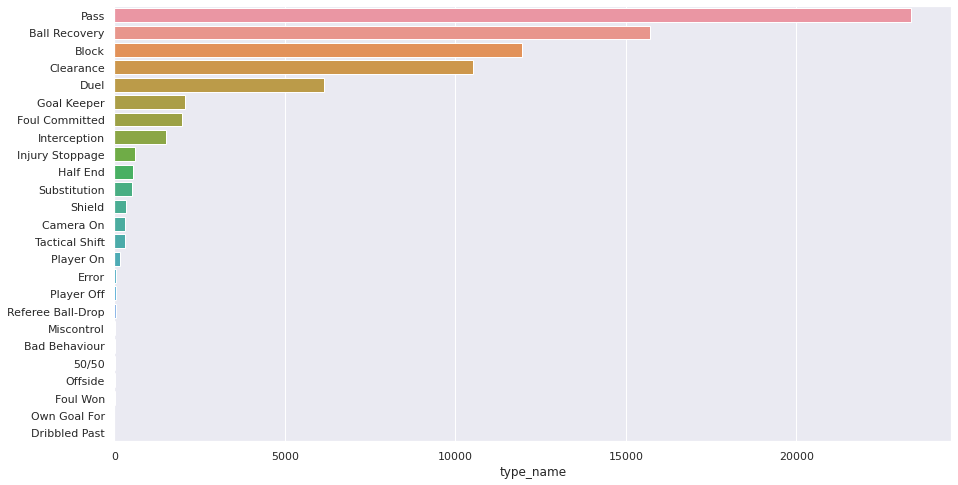

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = no_br_pressure, y = no_br_pressure.index)


### Continuing the setup for what counts as a successful pass and placing that into a DF.

In [14]:
possess_pass = passes_actual.get("possession_team_name").reset_index(drop = True)

In [15]:
possess_after = after_passes.get("possession_team_name").reset_index(drop = True)

In [20]:
possess_after

0          Birmingham City WFC
1          Birmingham City WFC
2                  Reading WFC
3                  Reading WFC
4                  Reading WFC
                  ...         
1098101                  Spain
1098102                  Spain
1098103                  Spain
1098104                  Spain
1098105                  Spain
Name: possession_team_name, Length: 1098106, dtype: object

In [35]:
pass_success_df = pd.DataFrame({'pass_continue': (possess_pass == possess_after), 'possess_before': possess_pass, 'possess_after': possess_after})

In [36]:
pass_success_df

,pass_continue,possess_before,possess_after
0,True,Birmingham City WFC,Birmingham City WFC
1,True,Birmingham City WFC,Birmingham City WFC
2,True,Reading WFC,Reading WFC
3,True,Reading WFC,Reading WFC
4,True,Reading WFC,Reading WFC
...,...,...,...
1098101,True,Spain,Spain
1098102,True,Spain,Spain
1098103,True,Spain,Spain
1098104,True,Spain,Spain


In [38]:
# Combining success status and teams with the pass-specific columns singled out earlier

total_pass_df = pd.concat([pass_success_df, pass_cols], axis = 1)
total_pass_df

,pass_continue,possess_before,possess_after,pass_length,pass_angle,pass_recipient_id,pass_recipient_name,pass_height_id,pass_height_name,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,pass_end_location_x,pass_end_location_y
0,True,Birmingham City WFC,Birmingham City WFC,7.117584,-3.071286,15562.0,Lucy Staniforth,1.0,Ground Pass,65.0,Kick Off,40.0,Right Foot,53.9,39.6
1,True,Birmingham City WFC,Birmingham City WFC,72.217730,0.431441,15580.0,Claudia Walker,3.0,High Pass,NaN,NaN,40.0,Right Foot,118.4,72.9
2,True,Reading WFC,Reading WFC,12.601587,0.943167,15720.0,Sophie Howard,1.0,Ground Pass,63.0,Goal Kick,38.0,Left Foot,13.4,54.2
3,True,Reading WFC,Reading WFC,22.489109,0.089050,26570.0,Amalie Vevle Eikeland,1.0,Ground Pass,NaN,NaN,40.0,Right Foot,62.0,60.2
4,True,Reading WFC,Reading WFC,34.269080,0.099378,31563.0,Rachel Williams,3.0,High Pass,NaN,NaN,38.0,Left Foot,69.9,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098101,True,Spain,Spain,14.447491,-2.053018,5208.0,Thiago Alcântara do Nascimento,1.0,Ground Pass,62.0,Free Kick,40.0,Right Foot,64.4,25.4
1098102,True,Spain,Spain,27.290474,-0.855413,5211.0,Jordi Alba Ramos,1.0,Ground Pass,NaN,NaN,40.0,Right Foot,91.8,3.1
1098103,True,Spain,Spain,9.902020,1.550597,6685.0,Mikel Oyarzabal Ugarte,1.0,Ground Pass,NaN,NaN,38.0,Left Foot,92.0,13.0
1098104,True,Spain,Spain,53.027540,1.027789,6840.0,Marcos Llorente Moreno,3.0,High Pass,NaN,NaN,38.0,Left Foot,117.1,57.7


#### Defining pass angles into different bins (after making them all positive radians) and then analyzing pass success based on angle bin.

In [154]:
angles = total_pass_df.get("pass_angle")

In [155]:
angles

0         -3.071286
1          0.431441
2          0.943167
3          0.089050
4          0.099378
             ...   
1098101   -2.053018
1098102   -0.855413
1098103    1.550597
1098104    1.027789
1098105   -1.914676
Name: pass_angle, Length: 1098106, dtype: float64

In [157]:
angles_pos = angles.transform(positive_angle)

In [158]:
angle_bins = pd.cut(angles_pos, 10)

In [159]:
total_pass_df['angle_bins'] = angle_bins

In [156]:
def positive_angle(angle_val):
    if angle_val < 0:
        angle_val = 2 * np.pi + angle_val
    return angle_val

In [161]:
angle_counts = total_pass_df.groupby(["angle_bins", "pass_continue"]).count()['possess_before']

<AxesSubplot:xlabel='pass_continue', ylabel='possess_before'>

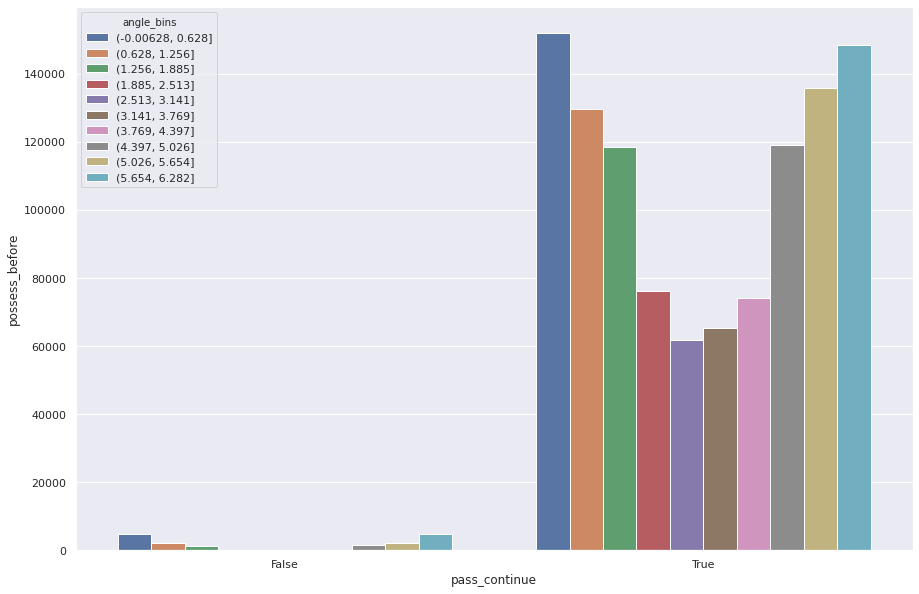

In [162]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(x = angle_counts.index.get_level_values(1), y = angle_counts, hue = angle_counts.index.get_level_values(0))


### Separating passes into successful and unsuccessful and then mapping them onto the pitch using the end location.

In [91]:
good_passes = total_pass_df[total_pass_df.get("pass_continue") == True].reset_index(drop = True)
good_passes

,pass_continue,possess_before,possess_after,pass_length,pass_angle,pass_recipient_id,pass_recipient_name,pass_height_id,pass_height_name,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,pass_end_location_x,pass_end_location_y,pass_length_bins
0,True,Birmingham City WFC,Birmingham City WFC,7.117584,-3.071286,15562.0,Lucy Staniforth,1.0,Ground Pass,65.0,Kick Off,40.0,Right Foot,53.9,39.6,"(5.96, 11.92]"
1,True,Birmingham City WFC,Birmingham City WFC,72.217730,0.431441,15580.0,Claudia Walker,3.0,High Pass,NaN,NaN,40.0,Right Foot,118.4,72.9,"(71.52, 77.48]"
2,True,Reading WFC,Reading WFC,12.601587,0.943167,15720.0,Sophie Howard,1.0,Ground Pass,63.0,Goal Kick,38.0,Left Foot,13.4,54.2,"(11.92, 17.88]"
3,True,Reading WFC,Reading WFC,22.489109,0.089050,26570.0,Amalie Vevle Eikeland,1.0,Ground Pass,NaN,NaN,40.0,Right Foot,62.0,60.2,"(17.88, 23.84]"
4,True,Reading WFC,Reading WFC,34.269080,0.099378,31563.0,Rachel Williams,3.0,High Pass,NaN,NaN,38.0,Left Foot,69.9,13.3,"(29.8, 35.76]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080617,True,Spain,Spain,14.447491,-2.053018,5208.0,Thiago Alcântara do Nascimento,1.0,Ground Pass,62.0,Free Kick,40.0,Right Foot,64.4,25.4,"(11.92, 17.88]"
1080618,True,Spain,Spain,27.290474,-0.855413,5211.0,Jordi Alba Ramos,1.0,Ground Pass,NaN,NaN,40.0,Right Foot,91.8,3.1,"(23.84, 29.8]"
1080619,True,Spain,Spain,9.902020,1.550597,6685.0,Mikel Oyarzabal Ugarte,1.0,Ground Pass,NaN,NaN,38.0,Left Foot,92.0,13.0,"(5.96, 11.92]"
1080620,True,Spain,Spain,53.027540,1.027789,6840.0,Marcos Llorente Moreno,3.0,High Pass,NaN,NaN,38.0,Left Foot,117.1,57.7,"(47.68, 53.64]"


In [93]:
good_pass_x = good_passes.get("pass_end_location_x")
good_pass_y = good_passes.get("pass_end_location_y")

In [92]:
bad_passes = total_pass_df[total_pass_df.get("pass_continue") == False].reset_index(drop = True)
bad_passes

,pass_continue,possess_before,possess_after,pass_length,pass_angle,pass_recipient_id,pass_recipient_name,pass_height_id,pass_height_name,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,pass_end_location_x,pass_end_location_y,pass_length_bins
0,False,Reading WFC,Birmingham City WFC,13.845216,-0.144961,NaN,NaN,3.0,High Pass,NaN,NaN,38.0,Left Foot,57.4,0.1,"(11.92, 17.88]"
1,False,Reading WFC,Birmingham City WFC,53.572006,0.687568,NaN,NaN,3.0,High Pass,62.0,Free Kick,40.0,Right Foot,118.1,41.5,"(47.68, 53.64]"
2,False,Birmingham City WFC,Reading WFC,29.201542,0.249131,NaN,NaN,3.0,High Pass,NaN,NaN,40.0,Right Foot,71.3,13.3,"(23.84, 29.8]"
3,False,Reading WFC,Birmingham City WFC,65.553640,0.290872,NaN,NaN,3.0,High Pass,62.0,Free Kick,38.0,Left Foot,119.8,20.4,"(59.6, 65.56]"
4,False,Birmingham City WFC,Reading WFC,44.086845,-1.066562,NaN,NaN,3.0,High Pass,NaN,NaN,40.0,Right Foot,112.4,38.7,"(41.72, 47.68]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17479,False,Switzerland,Spain,44.456722,-0.554307,NaN,NaN,2.0,Low Pass,NaN,NaN,40.0,Right Foot,99.9,43.4,"(41.72, 47.68]"
17480,False,Spain,Switzerland,9.929753,-0.328120,NaN,NaN,1.0,Ground Pass,NaN,NaN,40.0,Right Foot,94.4,16.0,"(5.96, 11.92]"
17481,False,Switzerland,Spain,28.577614,-0.520014,NaN,NaN,3.0,High Pass,NaN,NaN,68.0,Drop Kick,27.9,15.3,"(23.84, 29.8]"
17482,False,Spain,Switzerland,3.041381,1.735945,NaN,NaN,2.0,Low Pass,NaN,NaN,40.0,Right Foot,117.0,37.2,"(-0.119, 5.96]"


In [94]:
bad_pass_x = bad_passes.get("pass_end_location_x")
bad_pass_y = bad_passes.get("pass_end_location_y")

In [96]:
total_pass_df.get("pass_end_location_x").max()

120.9

In [97]:
total_pass_df.get("pass_end_location_x").min()

0.1

In [98]:
total_pass_df.get("pass_end_location_y").min()

0.1

In [99]:
total_pass_df.get("pass_end_location_y").max()

80.9

In [ ]:
# dimensions are 0-121 for x and 0-81 for y --> don't need to do any adjustment because it matches this format already

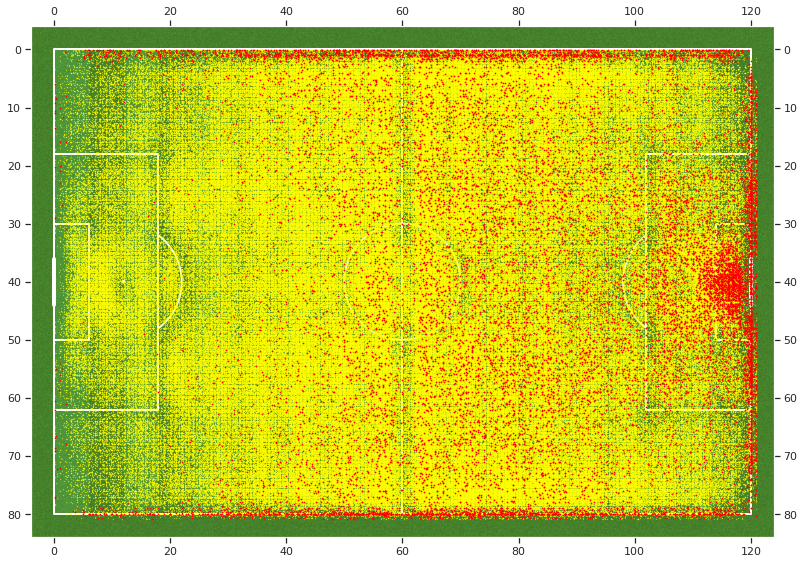

In [112]:
pass_ends = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pass_ends.draw(figsize=(16, 8))

ax.scatter(good_pass_x, good_pass_y, color = 'yellow', s = 0.05)
ax.scatter(bad_pass_x, bad_pass_y, color = 'red', s = 0.5)



#### Defining pass lengths into different bins and then analyzing pass success based on length bin (similar to angle).

In [67]:
pass_lengths = total_pass_df.get("pass_length")
pass_lengths

0           7.117584
1          72.217730
2          12.601587
3          22.489109
4          34.269080
             ...    
1098101    14.447491
1098102    27.290474
1098103     9.902020
1098104    53.027540
1098105    15.720369
Name: pass_length, Length: 1098106, dtype: float64

In [85]:
total_pass_df['pass_length_bins'] = pd.cut(pass_lengths, 20)

In [86]:
pass_length_success = total_pass_df.groupby(["pass_length_bins", "pass_continue"]).count()['possess_before']
pass_length_success

pass_length_bins    pass_continue
(-0.119, 5.96]      False               514
                    True              59019
(5.96, 11.92]       False              1478
                    True             241035
(11.92, 17.88]      False              1859
                    True             273624
(17.88, 23.84]      False              1662
                    True             186890
(23.84, 29.8]       False              1643
                    True             114241
(29.8, 35.76]       False              1656
                    True              69846
(35.76, 41.72]      False              1721
                    True              43451
(41.72, 47.68]      False              1533
                    True              29038
(47.68, 53.64]      False              1292
                    True              21067
(53.64, 59.6]       False              1077
                    True              15546
(59.6, 65.56]       False               952
                    True              1147

<AxesSubplot:xlabel='pass_continue', ylabel='possess_before'>

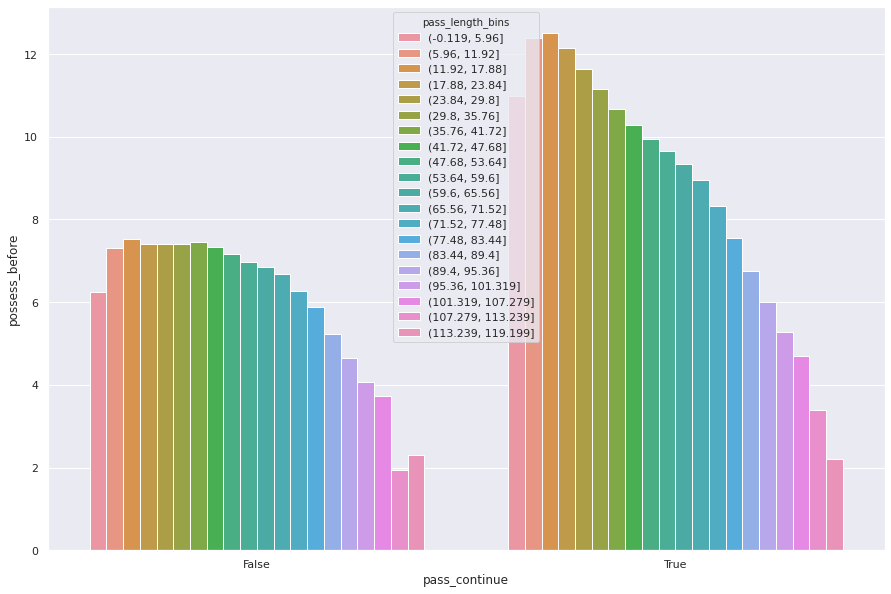

In [90]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(x = pass_length_success.index.get_level_values(1), y = np.log(pass_length_success), hue = pass_length_success.index.get_level_values(0))
# log scaled y axis - couldn't fit on a plot otherwise

### Analyzing the success on different types of pass (ground, low, high).

In [43]:
pass_type_success = total_pass_df.groupby(["pass_height_name", "pass_continue"]).count()['possess_before']
pass_type_success

pass_height_name  pass_continue
Ground Pass       False              2612
                  True             719725
High Pass         False             12326
                  True             213274
Low Pass          False              2546
                  True             147623
Name: possess_before, dtype: int64

In [61]:
# want these as proportions
pts_props = pass_type_success / total_pass_df.groupby(["pass_height_name"]).count()['possess_before']

In [63]:
pts_props

pass_height_name  pass_continue
Ground Pass       False            0.003616
                  True             0.996384
High Pass         False            0.054637
                  True             0.945363
Low Pass          False            0.016954
                  True             0.983046
Name: possess_before, dtype: float64

In [52]:
pass_type_success.index.get_level_values(0)

Index(['Ground Pass', 'Ground Pass', 'High Pass', 'High Pass', 'Low Pass',
       'Low Pass'],
      dtype='object', name='pass_height_name')

<AxesSubplot:xlabel='pass_height_name', ylabel='possess_before'>

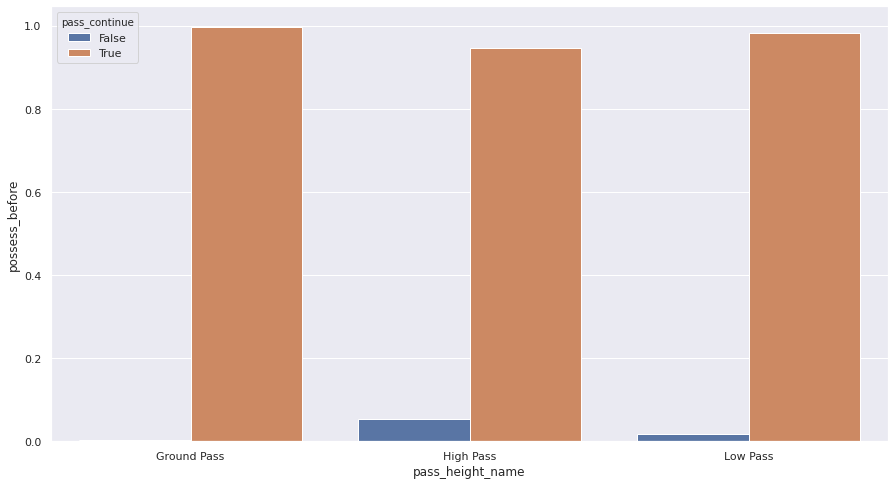

In [62]:
sns.barplot(x = pts_props.index.get_level_values(0), y = pts_props, hue = pts_props.index.get_level_values(1))


### Tried to look at different teams and how successful their passes were - visualization for all teams together wasn't helpful.

In [41]:
team_passes = total_pass_df.groupby(["possess_before", "pass_continue"]).count()['possess_after']

In [42]:
team_passes

possess_before           pass_continue
AC Milan                 False              26
                         True             1128
AS Monaco                False               5
                         True              522
Albacete                 False              42
                                          ... 
Wolverhampton Wanderers  True              678
Xerez                    False              35
                         True              516
Yeovil Town LFC          False             247
                         True             4829
Name: possess_after, Length: 318, dtype: int64

<AxesSubplot:xlabel='pass_continue', ylabel='possess_after'>

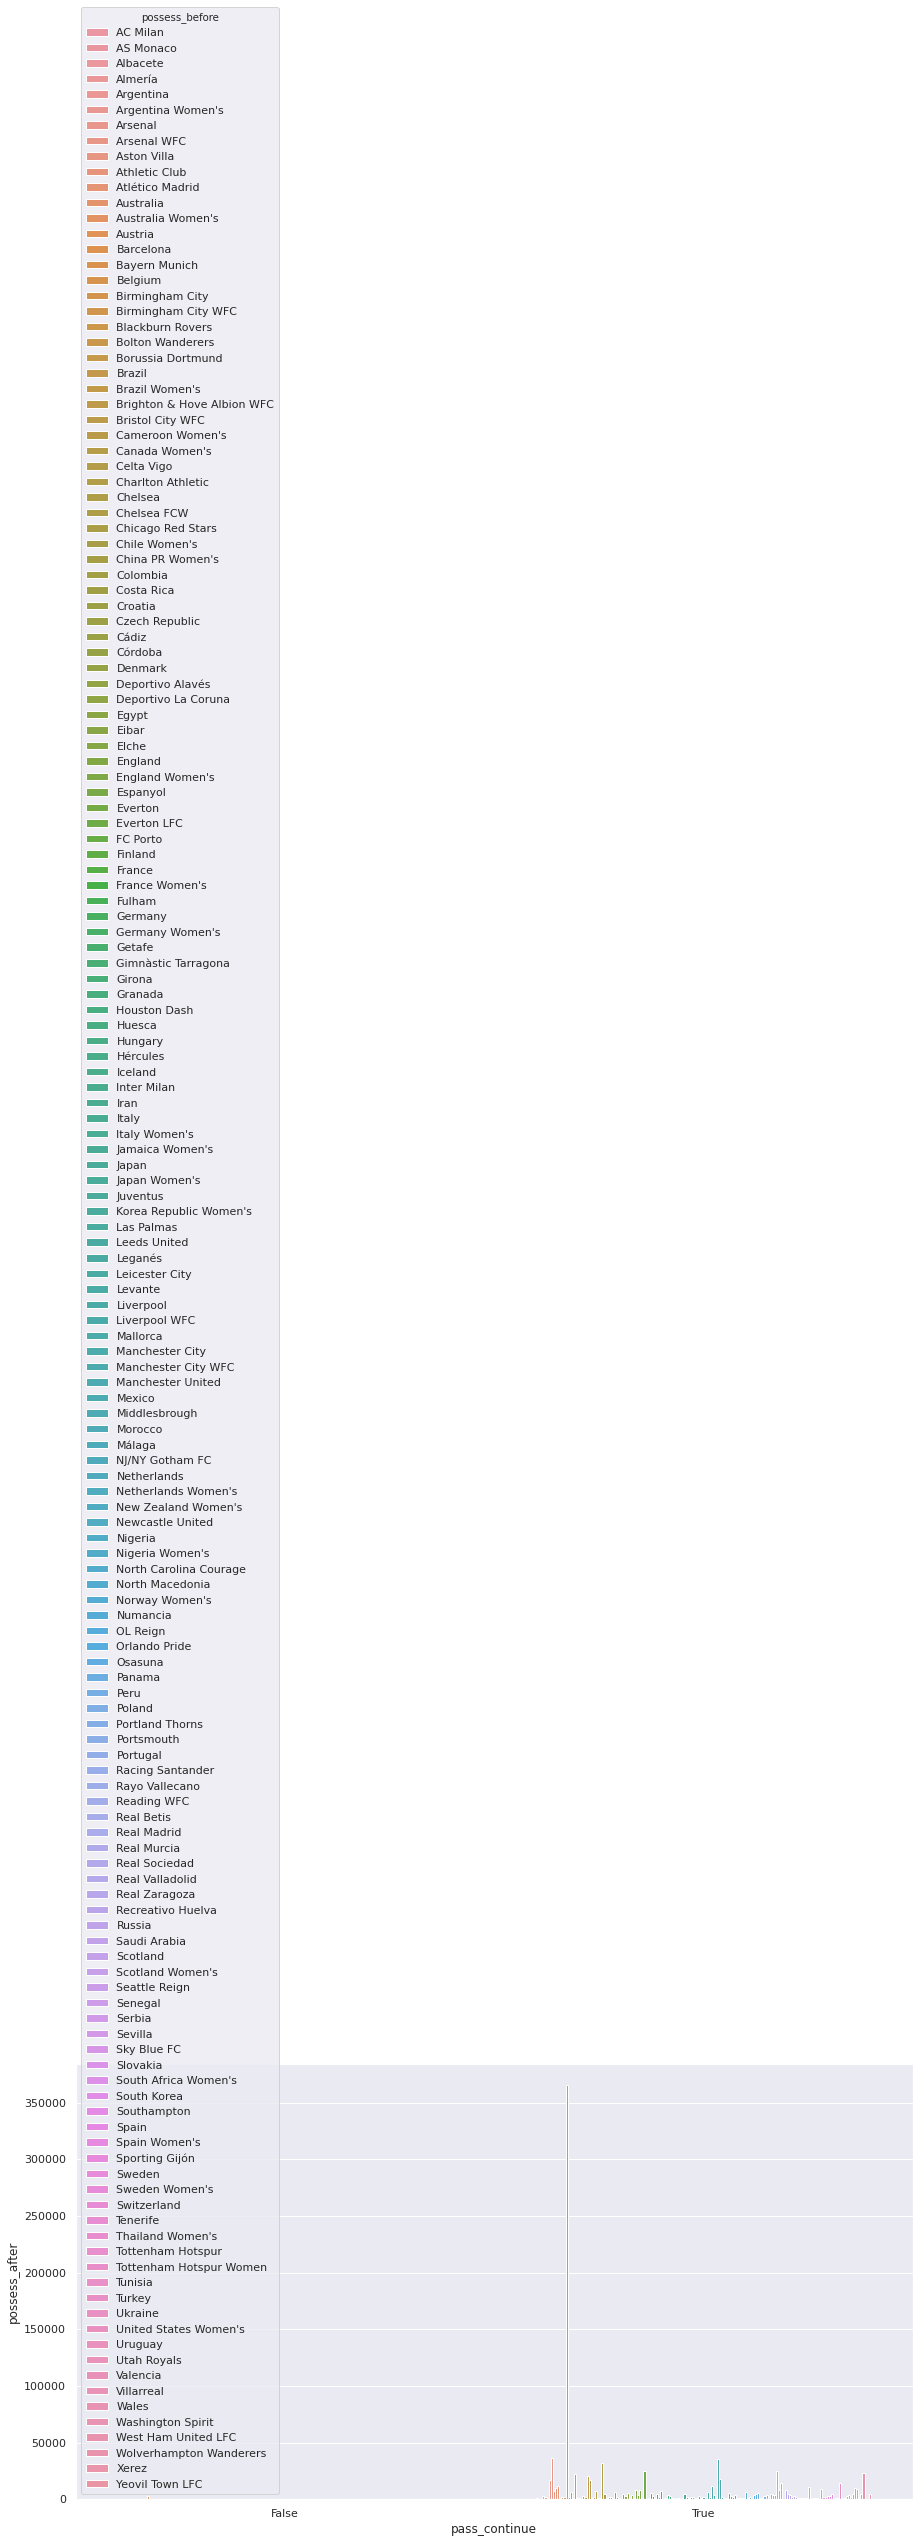

In [65]:
sns.barplot(x = team_passes.index.get_level_values(1), y = team_passes, hue = team_passes.index.get_level_values(0))


In [27]:
passes_actual.get("possession_team_name")

0          Birmingham City WFC
1          Birmingham City WFC
2                  Reading WFC
3                  Reading WFC
4                  Reading WFC
                  ...         
1098101                  Spain
1098102                  Spain
1098103                  Spain
1098104                  Spain
1098105                  Spain
Name: possession_team_name, Length: 1098106, dtype: object

In [4]:
passes_actual.shape

(1098106, 28)

In [5]:
passes_actual.columns

Index(['type_id', 'type_name', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_type_id', 'pass_type_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y'],
      dtype='object')

In [11]:
passes_actual.get('possession_team_name').value_counts()

Barcelona              368253
Arsenal WFC             36471
Manchester City WFC     36399
Chelsea FCW             32635
Reading WFC             25754
                        ...  
Everton                   357
Portsmouth                348
Leicester City            321
Gimnàstic Tarragona       292
Inter Milan               287
Name: possession_team_name, Length: 159, dtype: int64

In [9]:
passes_actual.get('possession').value_counts()

2      9562
3      6980
4      6535
23     6282
20     6256
       ... 
290       4
289       3
285       2
293       2
294       2
Name: possession, Length: 293, dtype: int64

## Looking at duel dataframe.

In [163]:
duels = pd.read_csv('duel_df.csv')
duels.head(5)

,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,id,index,period,timestamp,minute,second,possession,counterpress,duel_type,outcome
0,35,Starting XI,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,91fdaa62-e36b-4aca-8c56-7a6d32289483,1,1,00:00:00.000,0,0,1,NaN,NaN,NaN
1,35,Starting XI,974,Reading WFC,1,Regular Play,969,Birmingham City WFC,2275050,aae12223-7969-4f4e-ac4e-83b075af1352,2,1,00:00:00.000,0,0,1,NaN,NaN,NaN
2,18,Half Start,974,Reading WFC,1,Regular Play,969,Birmingham City WFC,2275050,ba7b6ef4-edab-43e9-8ed2-ccc073667b8f,3,1,00:00:00.000,0,0,1,NaN,NaN,NaN
3,18,Half Start,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,f8f30929-e011-4ea9-bbc9-c22873023d5f,4,1,00:00:00.000,0,0,1,NaN,NaN,NaN
4,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,c0927b64-b182-4e44-83f0-b77222d600f8,5,1,00:00:00.443,0,0,2,NaN,NaN,NaN


In [164]:
duels.shape

(3970562, 19)

In [168]:
duels_actual = duels[duels.get('type_name') == 'Duel'].reset_index(drop = True)
duels_actual.head(5)

,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,id,index,period,timestamp,minute,second,possession,counterpress,duel_type,outcome
0,4,Duel,974,Reading WFC,7,From Goal Kick,974,Reading WFC,2275050,ebee3b2d-a669-42ef-9566-d827fd69183c,32,1,00:01:20.740,1,20,3,NaN,Aerial Lost,NaN
1,4,Duel,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,ec4e35a8-df0f-4415-8ea9-3e4db6abbc72,44,1,00:01:37.078,1,37,6,True,Tackle,NaN
2,4,Duel,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,096be974-cb6c-4a4c-84e4-1d17a2c893df,102,1,00:02:26.654,2,26,8,True,Tackle,NaN
3,4,Duel,974,Reading WFC,1,Regular Play,974,Reading WFC,2275050,6ecf7cdc-9af2-4844-98d1-31e58865ff4d,122,1,00:03:26.776,3,26,12,True,Tackle,NaN
4,4,Duel,969,Birmingham City WFC,8,From Keeper,974,Reading WFC,2275050,c8d80843-cb54-41df-99d9-2c27c5b05035,172,1,00:05:13.476,5,13,16,NaN,Tackle,NaN


In [169]:
duels_actual.shape

(70200, 19)

### Examining what leads to duels the most.

In [175]:
duels_patterns = duels_actual.get('play_pattern_name').value_counts(dropna = False)

<AxesSubplot:>

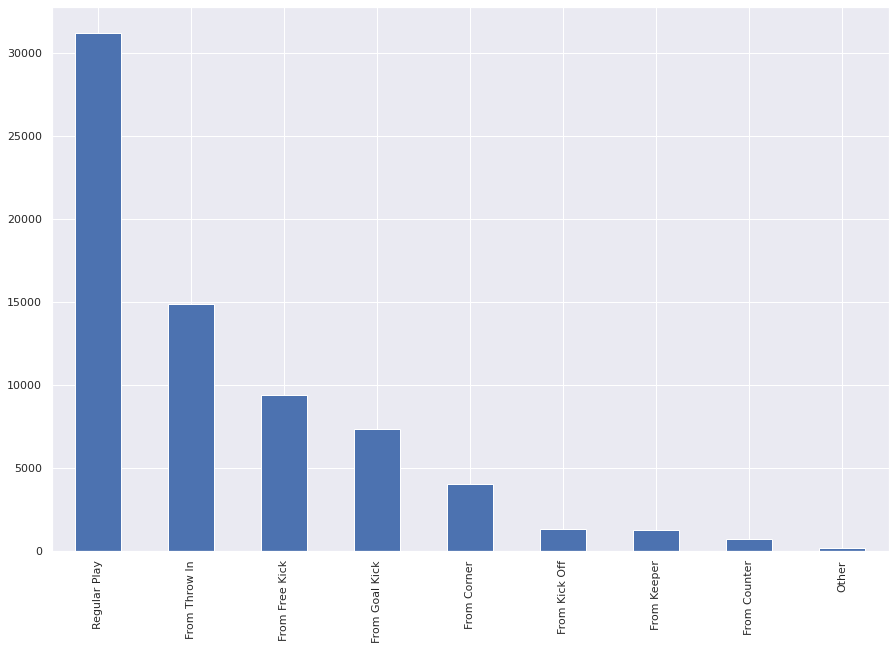

In [178]:
duels_patterns.plot(kind = 'bar')

In [180]:
 duels_actual.get('outcome').value_counts(dropna = False)

NaN        69228
success      606
fail         366
Name: outcome, dtype: int64

^ Did we assign these values to duels??? A lot of nuance is missing here based on documentation at: https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Events%20v4.0.0.pdf

Should be several values for outcome - Lost, Won, Lost in Play, Lost Out, Success, Success in Play, Success Out.

Additionally not sure why there are nans here, all duels should have an outcome.